# # IMDB Reviews Sentiment Analysis - Deep Learning

- **SimpleRNN**
- **LSTM**
- **GRU**
- **Bidirectional LSTM**

In [1]:
## Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
# Check for null values
df.isna().sum()

review       0
sentiment    0
dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

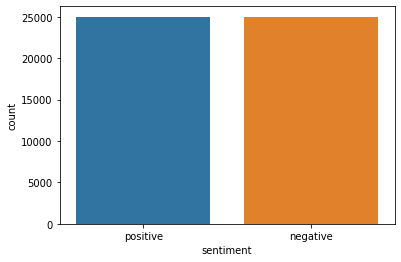

In [7]:
sns.countplot(data=df, x="sentiment")

In [8]:
for i in range (7):
    print('Review: ',[i])
    print('\n')
    print(df['review'].loc[i], '\n')
    print('Sentiment: ',df['sentiment'].iloc[i],'\n\n')

Review:  [0]


One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is

In [9]:
# Checking for balancement
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [10]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [11]:
df['word count'] = df['review'].apply(no_of_words)
df.head()


,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


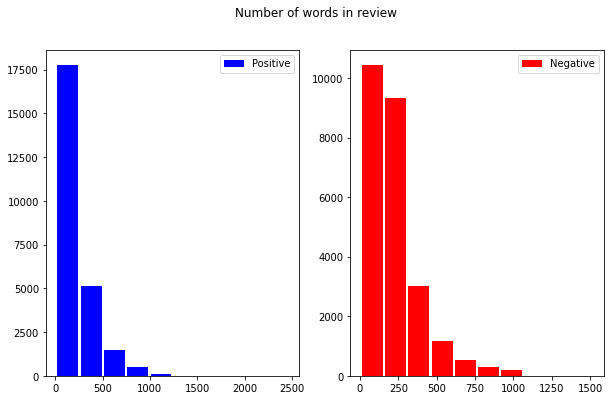

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in review")
plt.show()

In [13]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

In [14]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


### Data Preprocessing

In [15]:
import re 
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

In [16]:
def data_processing(text):
    text = text.lower()
    text = re.sub('<br />', '', text) 
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]','', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stopwords.words('english')]
    return " ".join(filtered_text)

In [17]:
df.review = df['review'].apply(data_processing)

In [18]:
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,0,138
4,petter matteis love time money visually stunni...,1,230


In [19]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [20]:
# duplicate values
df.duplicated().sum()

421

In [21]:
df.drop_duplicates(keep='first', inplace=True)

In [22]:
df.duplicated().sum()

0

In [23]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [24]:
df.review = df['review'].apply(lambda x: stemming(x))

In [25]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


In [26]:
pos_reviews = df[df.sentiment ==1]
pos_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


In [27]:
neg_reviews = df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,0,67
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64
10,phil alien one quirky films humour based aroun...,0,51
11,saw movie 12 came recall scariest scene big bi...,0,84


In [28]:
X = df['review']
y = df['sentiment']

In [29]:
X

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 49579, dtype: object

In [30]:
## One hot Representation 

voc_size = 5000

one_hot_rep = [one_hot(words,voc_size)for words in X]

In [31]:
X[1],one_hot_rep[1]

('wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done',
 [696,
  2410,
  1178,
  1336,
  3421,
  774,
  2953,
  4006,
  4816,
  1119,
  3418,
  4663,
  612,
  3040,
  381,
  4794,
  1808,
  2335,
  237,
  3913,
  3516,
  3814,
  61,
  1309,
  1073,
  2810,
  1790,
  4292,
  997,
  975,
  4212,
  365,
  4276,
  4207,
  3068,
  237,
  692,
  144,
  4627,
  2808,
  4240,
  4794,
  1,
  1178,
  1

In [32]:
## Embedding representation
sent_length = 200

embedding_doc = pad_sequences(one_hot_rep,padding='post',maxlen=sent_length)

In [33]:
embedding_doc

array([[1458, 1843, 4851, ...,    0,    0,    0],
       [ 696, 2410, 1178, ...,    0,    0,    0],
       [3838,  696, 1447, ...,    0,    0,    0],
       ...,
       [3511, 2878, 3590, ...,    0,    0,    0],
       [3183,   12, 2874, ...,    0,    0,    0],
       [1458, 2088,  621, ...,    0,    0,    0]], dtype=int32)

In [34]:
X[1],one_hot_rep[1],embedding_doc[1]

('wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done',
 [696,
  2410,
  1178,
  1336,
  3421,
  774,
  2953,
  4006,
  4816,
  1119,
  3418,
  4663,
  612,
  3040,
  381,
  4794,
  1808,
  2335,
  237,
  3913,
  3516,
  3814,
  61,
  1309,
  1073,
  2810,
  1790,
  4292,
  997,
  975,
  4212,
  365,
  4276,
  4207,
  3068,
  237,
  692,
  144,
  4627,
  2808,
  4240,
  4794,
  1,
  1178,
  1

In [35]:
X_final = np.array(embedding_doc)
y_final = np.array(y)

In [36]:
X_final.shape,y_final.shape

((49579, 200), (49579,))

In [37]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_final,y_final,test_size=0.2,random_state=42)

In [38]:
X_train.shape,X_test.shape

((39663, 200), (9916, 200))

In [39]:
y_train.shape,y_test.shape

((39663,), (9916,))

In [40]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [41]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Model Building

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
# Train the models with early stopping
early_stopping = EarlyStopping(monitor='val_loss',patience=3, restore_best_weights=True)

##  Simple RNN

In [44]:
model_RNN =Sequential()
model_RNN.add(Embedding(voc_size,100,input_length = sent_length))
model_RNN.add(SimpleRNN(100))
model_RNN.add(Dense(1,activation='sigmoid'))
model_RNN.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
model_RNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          500000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               20100     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 520201 (1.98 MB)
Trainable params: 520201 (1.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model_history = model_RNN.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=100,callbacks=[early_stopping])

Epoch 1/30
397/397 [==============================] - 54s 132ms/step - loss: 0.6952 - accuracy: 0.5072 - val_loss: 0.6994 - val_accuracy: 0.5020
Epoch 2/30
397/397 [==============================] - 50s 127ms/step - loss: 0.6928 - accuracy: 0.5131 - val_loss: 0.6922 - val_accuracy: 0.5047
Epoch 3/30
397/397 [==============================] - 50s 127ms/step - loss: 0.6862 - accuracy: 0.5212 - val_loss: 0.6860 - val_accuracy: 0.5252
Epoch 4/30
397/397 [==============================] - 50s 125ms/step - loss: 0.6683 - accuracy: 0.5416 - val_loss: 0.6881 - val_accuracy: 0.5249
Epoch 5/30
397/397 [==============================] - 51s 127ms/step - loss: 0.6485 - accuracy: 0.5585 - val_loss: 0.7014 - val_accuracy: 0.5241
Epoch 6/30
397/397 [==============================] - 50s 126ms/step - loss: 0.6251 - accuracy: 0.5666 - val_loss: 0.7205 - val_accuracy: 0.5282


In [47]:
model_RNN.evaluate(X_train, y_train)

1240/1240 [==============================] - 24s 20ms/step - loss: 0.6696 - accuracy: 0.5520


[0.6695696115493774, 0.5519753694534302]

In [48]:
model_RNN.evaluate(X_test, y_test)

310/310 [==============================] - 6s 19ms/step - loss: 0.6860 - accuracy: 0.5252


[0.6859990358352661, 0.525211751461029]

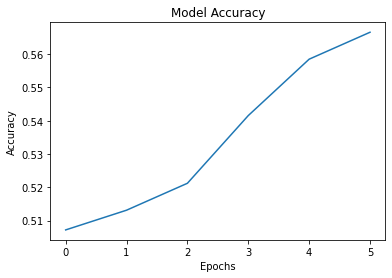

In [49]:
# plot summarize history for loss & val_loss

plt.plot(model_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

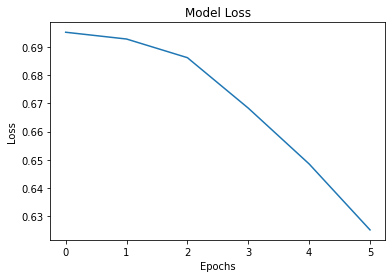

In [50]:
# plot summarize history for loss & val_loss

plt.plot(model_history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [52]:
## Prediction & Evaluation

y_pred = model_RNN.predict(X_test)
y_pred =np.where(y_pred > 0.5,1, 0)


310/310 [==============================] - 11s 32ms/step


In [53]:

## Evaluating 

from sklearn.metrics import  accuracy_score, confusion_matrix , classification_report

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.62      0.56      4909
           1       0.54      0.43      0.48      5007

    accuracy                           0.53      9916
   macro avg       0.53      0.53      0.52      9916
weighted avg       0.53      0.53      0.52      9916



In [55]:
score= accuracy_score(y_test,y_pred)
score

0.5252117789431222

## LSTM Model

In [56]:
model_LSTM =Sequential()
model_LSTM.add(Embedding(voc_size,100,input_length = sent_length))
model_LSTM.add(LSTM(100))
model_LSTM.add(Dense(1,activation='sigmoid'))
model_LSTM.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
model_history = model_LSTM.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=100,callbacks=[early_stopping])

Epoch 1/30


397/397 [==============================] - 220s 540ms/step - loss: 0.6671 - accuracy: 0.5719 - val_loss: 0.5953 - val_accuracy: 0.7059
Epoch 2/30
397/397 [==============================] - 304s 765ms/step - loss: 0.5736 - accuracy: 0.7312 - val_loss: 0.6140 - val_accuracy: 0.6836
Epoch 3/30
397/397 [==============================] - 440s 1s/step - loss: 0.5660 - accuracy: 0.7223 - val_loss: 0.5557 - val_accuracy: 0.7516
Epoch 4/30
397/397 [==============================] - 221s 556ms/step - loss: 0.5416 - accuracy: 0.7539 - val_loss: 0.6336 - val_accuracy: 0.6539
Epoch 5/30
397/397 [==============================] - 258s 648ms/step - loss: 0.5278 - accuracy: 0.7584 - val_loss: 0.5811 - val_accuracy: 0.7257
Epoch 6/30
397/397 [==============================] - 269s 678ms/step - loss: 0.5440 - accuracy: 0.7291 - val_loss: 0.6711 - val_accuracy: 0.5265


In [58]:
model_LSTM.evaluate(X_train, y_train)

1240/1240 [==============================] - 73s 59ms/step - loss: 0.5199 - accuracy: 0.7717


[0.5199486613273621, 0.7717015743255615]

In [59]:
model_LSTM.evaluate(X_test, y_test)

310/310 [==============================] - 18s 58ms/step - loss: 0.5557 - accuracy: 0.7516


[0.5557414889335632, 0.7516135573387146]

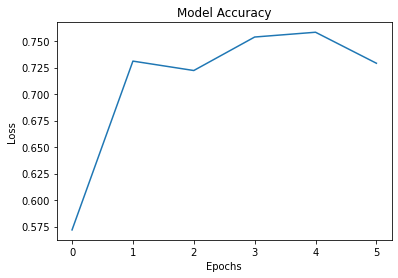

In [60]:
# plot summarize history for loss & val_loss

plt.plot(model_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

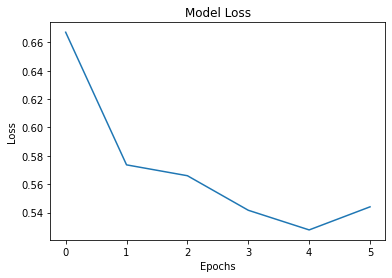

In [61]:
# plot summarize history for loss & val_loss

plt.plot(model_history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [62]:
## Prediction & Evaluation

y_pred = model_LSTM.predict(X_test)
y_pred =np.where(y_pred > 0.5,1, 0)


310/310 [==============================] - 20s 62ms/step


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74      4909
           1       0.73      0.80      0.76      5007

    accuracy                           0.75      9916
   macro avg       0.75      0.75      0.75      9916
weighted avg       0.75      0.75      0.75      9916



In [64]:
score= accuracy_score(y_test,y_pred)
score

0.7516135538523598

## GRU Model

In [65]:
model_GRU =Sequential()
model_GRU.add(Embedding(voc_size,100,input_length = sent_length))
model_GRU.add(GRU(100))
model_GRU.add(Dense(1,activation='sigmoid'))
model_GRU.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [66]:
model_GRU.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=100,callbacks=[early_stopping])

Epoch 1/10
397/397 [==============================] - 233s 576ms/step - loss: 0.6877 - accuracy: 0.5194 - val_loss: 0.6796 - val_accuracy: 0.5287
Epoch 2/10
397/397 [==============================] - 186s 467ms/step - loss: 0.6514 - accuracy: 0.5817 - val_loss: 0.6725 - val_accuracy: 0.5353
Epoch 3/10
397/397 [==============================] - 173s 436ms/step - loss: 0.5964 - accuracy: 0.6541 - val_loss: 0.6850 - val_accuracy: 0.5187
Epoch 4/10
397/397 [==============================] - 186s 470ms/step - loss: 0.6377 - accuracy: 0.5655 - val_loss: 0.6186 - val_accuracy: 0.6955
Epoch 5/10
397/397 [==============================] - 195s 493ms/step - loss: 0.5063 - accuracy: 0.7453 - val_loss: 0.4415 - val_accuracy: 0.7968
Epoch 6/10
397/397 [==============================] - 163s 411ms/step - loss: 0.3273 - accuracy: 0.8601 - val_loss: 0.3558 - val_accuracy: 0.8494
Epoch 7/10
397/397 [==============================] - 173s 436ms/step - loss: 0.2638 - accuracy: 0.8928 - val_loss: 0.3547 -

In [67]:
model_GRU.evaluate(X_train, y_train)

1240/1240 [==============================] - 51s 41ms/step - loss: 0.2006 - accuracy: 0.9271


[0.20057101547718048, 0.9271109104156494]

In [68]:
model_GRU.evaluate(X_test, y_test)

310/310 [==============================] - 13s 40ms/step - loss: 0.3547 - accuracy: 0.8505


[0.35470595955848694, 0.8505445718765259]

In [72]:
## Prediction & Evaluation

y_pred = model_GRU.predict(X_test)
y_pred =np.where(y_pred > 0.5,1, 0)

310/310 [==============================] - 17s 53ms/step


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4909
           1       0.86      0.83      0.85      5007

    accuracy                           0.85      9916
   macro avg       0.85      0.85      0.85      9916
weighted avg       0.85      0.85      0.85      9916



In [74]:
score= accuracy_score(y_test,y_pred)
score

0.8505445744251714

## Bidirectional LSTM

In [76]:
from tensorflow.keras.layers import Embedding,  LSTM,Bidirectional, Dense, Dropout
model_BLSTM =Sequential()
model_BLSTM.add(Embedding(voc_size,100,input_length = sent_length))
model_BLSTM.add(Bidirectional(LSTM(100)))
model_BLSTM.add(Dense(1,activation='sigmoid'))
model_BLSTM.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [77]:
model_BLSTM.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=100,callbacks=[early_stopping])

Epoch 1/10
397/397 [==============================] - 340s 836ms/step - loss: 0.4268 - accuracy: 0.8069 - val_loss: 0.3467 - val_accuracy: 0.8532
Epoch 2/10
397/397 [==============================] - 319s 804ms/step - loss: 0.3094 - accuracy: 0.8756 - val_loss: 0.3702 - val_accuracy: 0.8419
Epoch 3/10
397/397 [==============================] - 323s 814ms/step - loss: 0.2797 - accuracy: 0.8871 - val_loss: 0.3582 - val_accuracy: 0.8544
Epoch 4/10
397/397 [==============================] - 322s 811ms/step - loss: 0.2520 - accuracy: 0.8995 - val_loss: 0.3616 - val_accuracy: 0.8532


In [78]:
model_BLSTM.evaluate(X_train, y_train)

1240/1240 [==============================] - 126s 101ms/step - loss: 0.2932 - accuracy: 0.8859


[0.2931767404079437, 0.8858634233474731]

In [79]:
model_BLSTM.evaluate(X_test, y_test)

310/310 [==============================] - 25s 79ms/step - loss: 0.3467 - accuracy: 0.8532


[0.34666797518730164, 0.8531665802001953]

In [82]:
## Prediction & Evaluation

y_pred = model_BLSTM.predict(X_test)
y_pred =np.where(y_pred > 0.5,1, 0)

310/310 [==============================] - 28s 88ms/step


In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      4909
           1       0.83      0.90      0.86      5007

    accuracy                           0.85      9916
   macro avg       0.86      0.85      0.85      9916
weighted avg       0.86      0.85      0.85      9916



In [84]:
score= accuracy_score(y_test,y_pred)
score

0.8531665994352562